In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:

well = pd.read_csv('C:\\Users\\c-292.CSV' , header=0)

print(well)

       DEPTH   SP   GR   CALI    RHOB  DT       NPHI   MSFL    ILD
0     8200.0    3   53   12.1    2.21      114  0.45    0.6    0.6
1     8200.5    4   54   12.1    2.22      114  0.44    0.7    0.5
2     8201.0    5   54   12.1    2.21      115  0.42    0.7    0.5
3     8201.5    5   54   12.0    2.21      115  0.41    0.6    0.5
4     8202.0    5   53   12.0    2.21      114  0.41    0.7    0.5
...      ...  ...  ...    ...     ...      ...   ...    ...    ...
2216 -9308.0 -999 -999 -999.0 -999.00    -1998  0.00 -999.0 -999.0
2217 -9308.5 -999 -999 -999.0 -999.00    -1998  0.00 -999.0 -999.0
2218 -9309.0 -999 -999 -999.0 -999.00    -1998  0.00 -999.0 -999.0
2219 -9309.5 -999 -999 -999.0 -999.00    -1998  0.00 -999.0 -999.0
2220 -9310.0 -999 -999 -999.0 -999.00    -1998  0.00 -999.0 -999.0

[2221 rows x 9 columns]


In [36]:
headerName = ['DEPTH','SP','GR','CALI','RHOB','DT','HPHI','MSFL','ILD']

well.columes = [headerName]

well

C:\Users\essa\AppData\Local\Temp\ipykernel_7976\78052168.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  well.columes = [headerName]


,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD
0,8200.0,3,53,12.1,2.21,114,0.45,0.6,0.6
1,8200.5,4,54,12.1,2.22,114,0.44,0.7,0.5
2,8201.0,5,54,12.1,2.21,115,0.42,0.7,0.5
3,8201.5,5,54,12.0,2.21,115,0.41,0.6,0.5
4,8202.0,5,53,12.0,2.21,114,0.41,0.7,0.5
...,...,...,...,...,...,...,...,...,...
2216,-9308.0,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0
2217,-9308.5,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0
2218,-9309.0,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0
2219,-9309.5,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0


In [37]:
well.head()


,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD
0,8200.0,3,53,12.1,2.21,114,0.45,0.6,0.6
1,8200.5,4,54,12.1,2.22,114,0.44,0.7,0.5
2,8201.0,5,54,12.1,2.21,115,0.42,0.7,0.5
3,8201.5,5,54,12.0,2.21,115,0.41,0.6,0.5
4,8202.0,5,53,12.0,2.21,114,0.41,0.7,0.5


In [38]:
well.replace(-999, np.nan, inplace=True)


In [39]:

tops = ('Zone-1','zone-2','zone-3', 'zone-4','zone-5','zone-6','zone-7', 'zone-8')
tops_depths=(8200,8228,8312.5,8491.5,8642.5, 8700,8857,9220.5)


In [50]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=well[(well.DEPTH >= top_depth) & (well.DEPTH <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,100)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPTH, label='SP[mV]', color='blue')
    ax01.set_xlabel('SP[mV]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,16)
    ax02.plot(logs.CALI, logs.DEPTH, '--', label='CALN[in]', color='black') 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='black')    
    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPTH, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,200)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.ILD, logs.DEPTH, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.MSFL, logs.DEPTH, label='MSFL[m.ohm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('MSFL[m.ohm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    
#3rd track: DT, RHOB, NPHI track
    ax21=ax[2].twiny()
    ax21.set_xlim(-0.15,0.45)
    ax21.invert_xaxis()
    ax21.plot(logs.NPHI, logs.DEPTH, label='NPHI[%]', color='green') 
    ax21.spines['top'].set_position(('outward',40))
    ax21.set_xlabel('NPHI[%]', color='green')    
    ax21.tick_params(axis='x', colors='green')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(1.95,2.95)
    ax22.plot(logs.RHOB, logs.DEPTH ,label='RHOB[g/cc]', color='red') 
    ax22.spines['top'].set_position(('outward',80))
    ax22.set_xlabel('RHOB[g/cc]',color='red')
    ax22.tick_params(axis='x', colors='red')
    
    ax23=ax[2].twiny()
    ax23.grid(True)
    ax23.set_xlim(140,40)
    ax23.spines['top'].set_position(('outward',0))
    ax23.set_xlabel('DT[us/ft]',color='blue')
    ax23.plot(logs.DT,logs.DEPTH,label='DT[us/ft]',color='blue')
    ax23.tick_params(axis='x',colors='blue')
    

  
    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

AttributeError: 'DataFrame' object has no attribute 'DT'

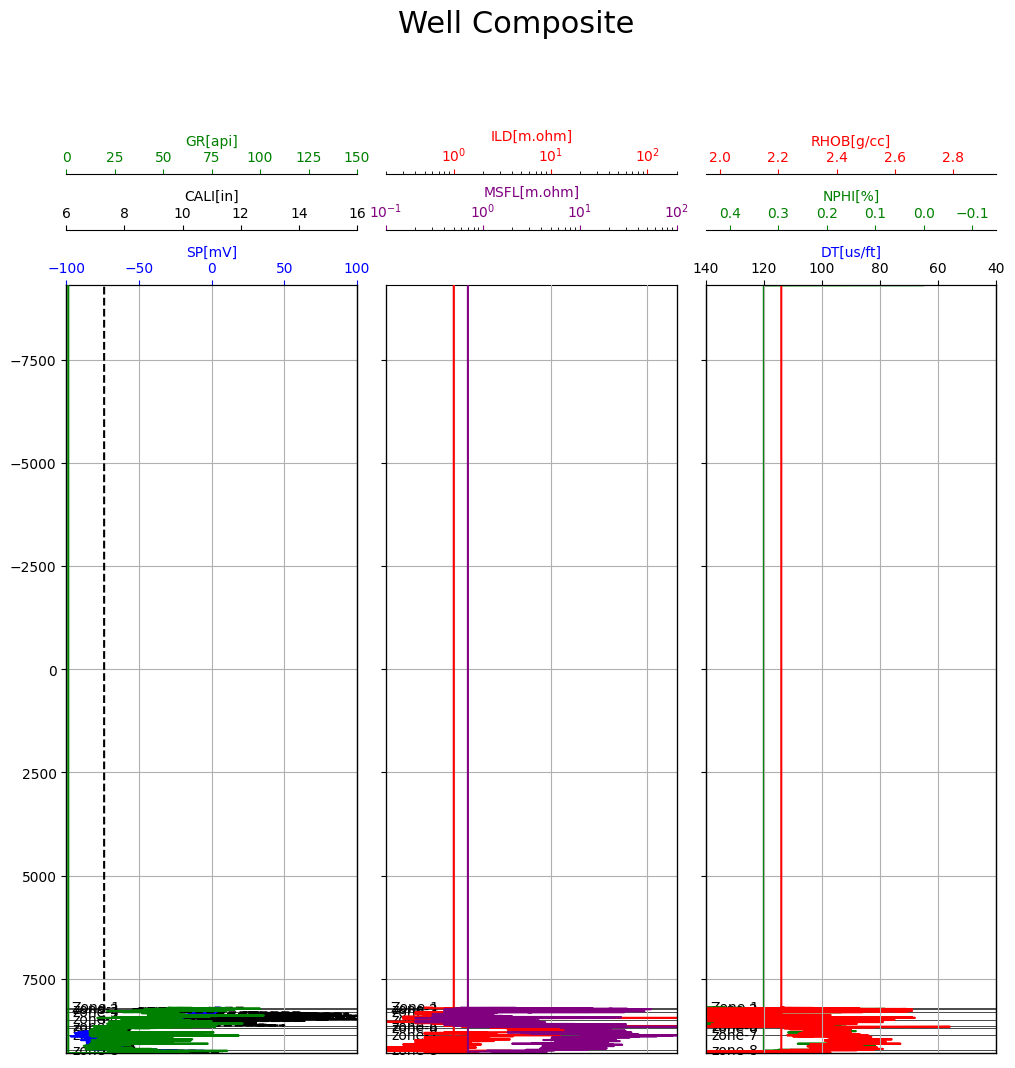

In [51]:
#%matplotlib nbagg

triple_combo_plot(well.DEPTH.min(),well.DEPTH.max())

AttributeError: 'DataFrame' object has no attribute 'DT'

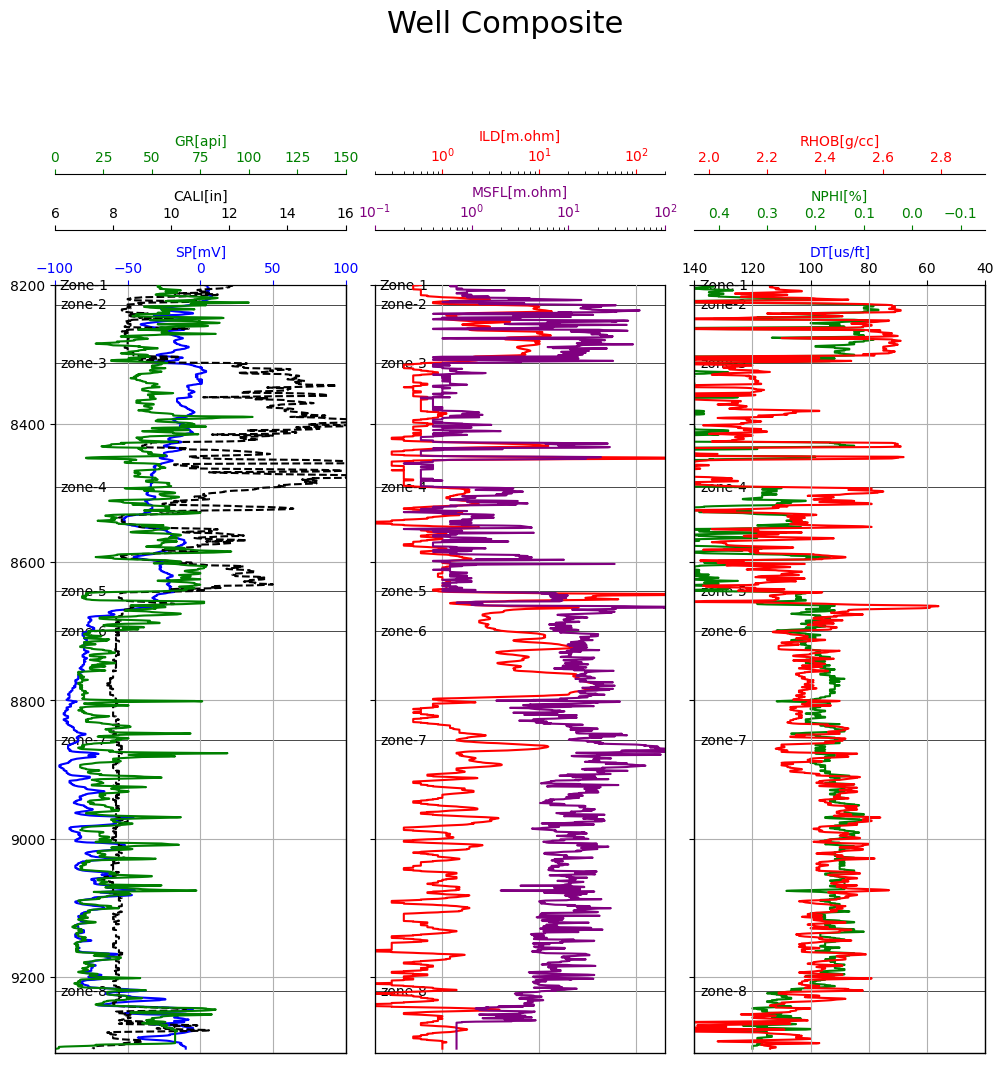

In [52]:
top_depth= 8200
bottom_depth=9310

triple_combo_plot(top_depth,bottom_depth)

In [ ]:
plt.savefig ('triple_combo_plot.png', dpi=200, format='png')